In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# from skcuda.linalg import PCA as cuPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from ta.volatility import AverageTrueRange, BollingerBands
from ta.trend import EMAIndicator
from ta.momentum import UltimateOscillator, StochasticOscillator, ROCIndicator, RSIIndicator, WilliamsRIndicator
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

In [64]:
df = pd.read_csv('F:\\ut\\8\\proje\\data\\newbit.csv').dropna()
df = df.iloc[[x for x in range(0,20000,10)]]

LSTM ws 5

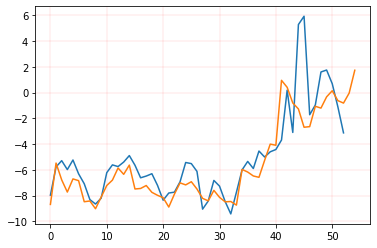

113 104 109 108 0.5934579439252337


In [37]:
WS = 5
df = pd.read_csv('F:\\ut\\8\\proje\\data\\newbit.csv').dropna()
df = df.iloc[[x for x in range(0,20000,10)]]
class Bitcoin(nn.Module):
    def __init__(self,inSize, hiddenSize, outSize,ws):
        super().__init__()
        self.hiddenSize = hiddenSize
        self.inSize = inSize
        lstm = []
        for i,item in enumerate(hiddenSize):
            lstm.append(nn.LSTM(inSize,hiddenSize[i],num_layers=2,dropout=.2))
            inSize = hiddenSize[i]
        self.lstm = nn.ModuleList(lstm)
        self.linear = nn.Linear(hiddenSize[-1], outSize)
        self.ws = ws
        self.reset()
    def reset(self):
        self.hiddenMemory =[]
        for item in self.hiddenSize:
            self.hiddenMemory.append((torch.zeros(2,1,item).cuda(),\
                            torch.zeros(2,1,item).cuda()))
    def forward(self,seq):
        seq=seq.view(self.ws,-1,self.inSize)
        for i,item1 in enumerate(self.hiddenMemory):
            seq ,self.hiddenMemory[i]= self.lstm[i](seq, self.hiddenMemory[i])
        x = self.linear(seq)
        return x[-1]
def make_input(seq,ws):
    output = []
    for item in range(len(seq) - ws):
        output.append( ((seq[item:item+ws].reshape(1,-1)[0].cuda()),\
                        torch.FloatTensor(np.array(seq[item + ws:item + ws+1][-1][-1])).cuda()) )
    return output

instance = Bitcoin(1,[300,200,100],1,WS).cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(instance.parameters(), lr = .01)
torch.manual_seed(33)
resultCol = ['Close']
scaler = MinMaxScaler(feature_range=(-20, 20 ))
train_set = np.array(df[resultCol][-500:-100].values.astype(float)).reshape(-1,1)
train_set = scaler.fit_transform(train_set)
train_set = torch.FloatTensor(train_set)
train_set = make_input(train_set, WS)
test = df[resultCol][-225:].values.astype(float).reshape(-1,1)
test = scaler.fit_transform(test)
test = torch.FloatTensor(test)
test = make_input(test,WS)
instance.load_state_dict(torch.load('F:\\ut\\8\\proje\\PN_result\\start400_5_3L_C.pn'))
preds = []
real = []
with torch.no_grad():
    for item, y in test:
        instance.reset()

        preds.append(instance.forward(item))
        real.append(y)
plt.plot(range(53), preds[-53:],)
# plt.show()
plt.grid(color='r', linestyle='-', linewidth=.1, zorder=.1)
# plt.show()
plt.plot(range(55), real[-55:])
plt.show()
preds = preds[-218:]
pred_up = 0
pred_down = 0
real_up = 0
real_down = 0
corect = 0
for i in range(1, min(len(preds), len((real)))):
    if preds[i] > preds[i-1]:
        pred_up += 1
    else:
        pred_down += 1
    if real[i] > real[i-1]:
        real_up += 1
        if preds[i] > preds[i-1]:
            corect += 1
    else:
        real_down += 1
        if preds[i] <= preds[i-1]:
            corect += 1
    
print(pred_up, pred_down, real_up, real_down, corect / 214)

LSTM ws26

In [19]:
len(preds)

220

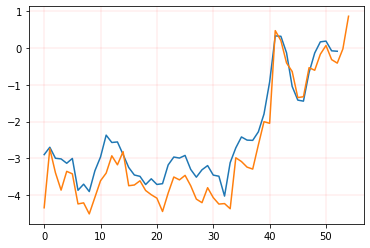

96 102 100 98 100


In [118]:
WS = 26
df = pd.read_csv('F:\\ut\\8\\proje\\data\\newbit.csv').dropna()
df = df.iloc[[x for x in range(0,20000,10)]]
class Bitcoin(nn.Module):
    def __init__(self,inSize, hiddenSize, outSize,ws):
        super().__init__()
        self.hiddenSize = hiddenSize
        self.inSize = inSize
        lstm = []
        for i,item in enumerate(hiddenSize):
            lstm.append(nn.LSTM(inSize,hiddenSize[i],num_layers=2,dropout=.2))
            inSize = hiddenSize[i]
        self.lstm = nn.ModuleList(lstm)
        self.linear = nn.Linear(hiddenSize[-1], outSize)
        self.ws = ws
        self.reset()
    def reset(self):
        self.hiddenMemory =[]
        for item in self.hiddenSize:
            self.hiddenMemory.append((torch.zeros(2,1,item).cuda(),\
                            torch.zeros(2,1,item).cuda()))
    def forward(self,seq):
        seq=seq.view(self.ws,-1,self.inSize)
        for i,item1 in enumerate(self.hiddenMemory):
            seq ,self.hiddenMemory[i]= self.lstm[i](seq, self.hiddenMemory[i])
        x = self.linear(seq)
        return x[-1]
def make_input(seq,ws):
    output = []
    for item in range(len(seq) - ws):
        output.append( ((seq[item:item+ws].reshape(1,-1)[0].cuda()),\
                        torch.FloatTensor(np.array(seq[item + ws:item + ws+1][-1][-1])).cuda()) )
    return output

instance = Bitcoin(1,[200,250,300,100],1,WS).cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(instance.parameters(), lr = .01)
torch.manual_seed(33)
resultCol = ['Close']
scaler = MinMaxScaler(feature_range=(-10, 10 ))
train_set = np.array(df[resultCol][-500:-100].values.astype(float)).reshape(-1,1)
train_set = scaler.fit_transform(train_set)
train_set = torch.FloatTensor(train_set)
train_set = make_input(train_set, WS)
test = df[resultCol][-225:].values.astype(float).reshape(-1,1)
test = scaler.fit_transform(test)
test = torch.FloatTensor(test)
test = make_input(test,WS)
instance.load_state_dict(torch.load('F:\\ut\\8\\proje\\PN_result\\start400_26_4L_R.pn'))
preds = []
real = []
with torch.no_grad():
    for item, y in test:
        instance.reset()

        preds.append(instance.forward(item))
        real.append(y)
plt.plot(range(53), preds[-53:],)
# plt.show()
plt.grid(color='r', linestyle='-', linewidth=.1, zorder=.1)
# plt.show()
plt.plot(range(55), real[-55:])
plt.show()
# preds = preds[-218:]
# real = real[-218:]
pred_up = 0
pred_down = 0
real_up = 0
real_down = 0
corect = 0
for i in range(1, min(len(preds), len((real)))):
    if preds[i] > preds[i-1]:
        pred_up += 1
    else:
        pred_down += 1
    if real[i] > real[i-1]:
        real_up += 1
        if preds[i] > preds[i-1]:
            corect += 1
    else:
        real_down += 1
        if preds[i] <= preds[i-1]:
            corect += 1
    
print(pred_up, pred_down, real_up, real_down, corect)

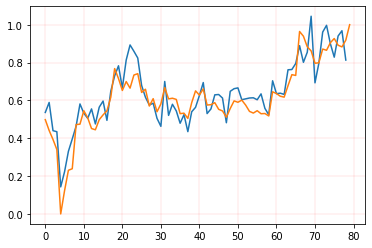

45 34 40 39 36


In [122]:
#%%
WS = 20
df = pd.read_csv('F:\\ut\\8\\proje\\data\\newbit.csv').dropna()
df = df.iloc[[x for x in range(0,20000,10)]]
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 3, 1)
        self.conv2 = nn.Conv2d(10, 20, 3, 1)
        self.conv3 = nn.Conv2d(20, 40, 4, 1)

        self.fc1 = nn.Linear(13*25*40, 200)
        self.fc2 = nn.Linear(200, 110)
        self.fc3 = nn.Linear(110,50)
        self.fc4 = nn.Linear(50,1)
        
        self.drop1 = nn.Dropout(p=.3)
        self.drop2 = nn.Dropout(p=.3)

    def forward(self, X):
        X = self.conv1(X)
        X = self.conv2(X)
        X = self.conv3(X)
        X = X.view(-1, 13*25*40)
        X = self.fc1(X)
        X = self.drop1(X)
        X = self.fc2(X)
        X = self.drop2(X)
        X = self.fc3(X)
        X = self.fc4(X)
        return X
def make_input(seq,ws, st_col, end_col):
    output = []
    for item in range(len(seq) - ws):
        output.append(((torch.FloatTensor(pd.DataFrame([x[st_col:end_col] for x in seq[item:item+ws]])\
                                    .values.astype(float).reshape(1,1,20,32)).cuda()),\
                        torch.FloatTensor(np.array(seq[item + ws:item + ws+1][-1][-1])).cuda()))
    return output
def add_indicators():
    added_columns = ['MA5','MA10','MA20', 'DIFF', 'BU', 'BL', 'Stochastic', \
                 'ROC', 'RSI6', 'RSI12', 'ATR', 'WR5', 'WR10', 'UOS'\
                     'I30', 'I31', 'I32', 'I33', 'I34', 'I35', 'I36', \
                      'I28', 'I29'   ]
    close = df['Close']
    df['MA5'] = close.rolling(window=5).mean()
    df['MA10'] = close.rolling(window=10).mean()
    df['MA20'] = close.rolling(window=20).mean()
    df['DIFF'] = EMAIndicator(close, n=12).ema_indicator() - EMAIndicator(close, n=26).ema_indicator()
    df['BL']=BollingerBands(close, n=20, ndev=2).bollinger_lband()
    df['BU']=BollingerBands(close, n=20, ndev=2).bollinger_hband()
    df['Stochastic']=StochasticOscillator(df['High'], df['Low'], close).stoch()
    df['ROC'] = ROCIndicator(close).roc()
    df['RSI6'] = RSIIndicator(close, 6).rsi()
    df['RSI12'] = RSIIndicator(close, 12).rsi()
    df['ATR'] = AverageTrueRange(df['High'],df['Low'], close).average_true_range() 
    df['WR10'] = WilliamsRIndicator(df['High'],df['Low'], close, lbp=10).wr()
    df['WR5'] = WilliamsRIndicator(df['High'],df['Low'], close, lbp=5).wr()
    df['UOS'] = UltimateOscillator(df['High'],df['Low'], close,).uo()
    df['I28'] = close.diff(1) / close.shift(1)
    df['I29'] = (close - df['Open']) / df['Open']
    df['I30'] = (close - df['High']) / (df['High'] - df['Low'])
    df['I31'] = df['MA5'].diff(1) / df['MA5'].shift(1)
    df['I32'] = df['MA10'].diff(1) / df['MA10'].shift(1)
    df['I33'] = df['MA20'].diff(1) / df['MA20'].shift(1)
    df['I34'] = df['MA5'].diff(1) / df['MA20'].shift(1)
    df['I35'] = (close - np.array([np.amin(close[:x]) for x in range(len(close))]))/np.array([np.amin(close[:x]) for x in range(len(close))])
    df['I36'] = (close - np.array([np.amax(close[:x]) for x in range(len(close))]))/np.array([np.amax(close[:x]) for x in range(len(close))])
    df.dropna(inplace= True)
    return added_columns
scaler = MinMaxScaler(feature_range=(0, 1 ))
add_indicators()
new_df = df
# new_df = np.array(PCA_function(df, 20))
new_df=np.append(new_df, df['Close'].values.astype(float).reshape(-1,1), axis=1)
new_df = pd.DataFrame(data=new_df)

train_set = np.array(new_df[-500:-100].values.astype(float))
train_set = scaler.fit_transform(train_set)
train_set = make_input(train_set, WS, st_col=0, end_col=32)

test = new_df[-100:].values.astype(float)
test = scaler.fit_transform(test)
test = make_input(test,WS, st_col=0, end_col=32)

instance = ConvolutionalNetwork().cuda()
instance.load_state_dict(torch.load('F:\\ut\\8\\proje\\PN_result\\CNN_32Indicators_TrainSize400_ep400.pn'))
instance = instance.cuda()

preds = []
real = []
with torch.no_grad():
    for item, y in test:
#         instance.reset()

        preds.append(instance.forward(item))
        real.append(y)
plt.plot(range(79), preds[-79:],)
# plt.show()
plt.grid(color='r', linestyle='-', linewidth=.1, zorder=.1)
# plt.show()
plt.plot(range(80), real[-80:])
plt.show()
pred_up = 0
pred_down = 0
real_up = 0
real_down = 0
corect = 0
for i in range(1, min(len(preds), len((real)))):
    if preds[i] > preds[i-1]:
        pred_up += 1
    else:
        pred_down += 1
    if real[i] > real[i-1]:
        real_up += 1
        if preds[i] > preds[i-1]:
            corect += 1
    else:
        real_down += 1
        if preds[i] <= preds[i-1]:
            corect += 1
    
print(pred_up, pred_down, real_up, real_down, corect)

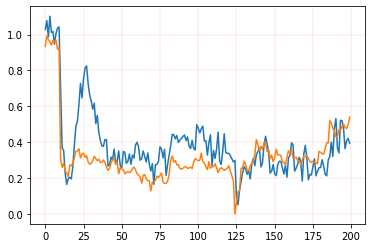

117 102 116 103 106


In [137]:
WS = 20
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 3, 1)
        self.conv2 = nn.Conv2d(10, 20, 3, 1)
        self.conv3 = nn.Conv2d(20, 40, 4, 1)

        self.fc1 = nn.Linear(13*25*40, 200)
        self.fc2 = nn.Linear(200, 110)
        self.fc3 = nn.Linear(110,50)
        self.fc4 = nn.Linear(50,1)
        
        self.drop1 = nn.Dropout(p=.3)
        self.drop2 = nn.Dropout(p=.3)

    def forward(self, X):
        X = self.conv1(X)
        X = self.conv2(X)
        X = self.conv3(X)
        X = X.view(-1, 13*25*40)
        X = self.fc1(X)
        X = self.drop1(X)
        X = self.fc2(X)
        X = self.drop2(X)
        X = self.fc3(X)
        X = self.fc4(X)
        return X
def make_input(seq,ws, st_col, end_col):
    output = []
    for item in range(len(seq) - ws):
        output.append(((torch.FloatTensor(pd.DataFrame([x[st_col:end_col] for x in seq[item:item+ws]])\
                                    .values.astype(float).reshape(1,1,20,32)).cuda()),\
                        torch.FloatTensor(np.array(seq[item + ws:item + ws+1][-1][-1])).cuda()))
    return output
def add_indicators():
    added_columns = ['MA5','MA10','MA20', 'DIFF', 'BU', 'BL', 'Stochastic', \
                 'ROC', 'RSI6', 'RSI12', 'ATR', 'WR5', 'WR10', 'UOS'\
                     'I30', 'I31', 'I32', 'I33', 'I34', 'I35', 'I36', \
                      'I28', 'I29'   ]
    close = df['Close']
    df['MA5'] = close.rolling(window=5).mean()
    df['MA10'] = close.rolling(window=10).mean()
    df['MA20'] = close.rolling(window=20).mean()
    df['DIFF'] = EMAIndicator(close, n=12).ema_indicator() - EMAIndicator(close, n=26).ema_indicator()
    df['BL']=BollingerBands(close, n=20, ndev=2).bollinger_lband()
    df['BU']=BollingerBands(close, n=20, ndev=2).bollinger_hband()
    df['Stochastic']=StochasticOscillator(df['High'], df['Low'], close).stoch()
    df['ROC'] = ROCIndicator(close).roc()
    df['RSI6'] = RSIIndicator(close, 6).rsi()
    df['RSI12'] = RSIIndicator(close, 12).rsi()
    df['ATR'] = AverageTrueRange(df['High'],df['Low'], close).average_true_range() 
    df['WR10'] = WilliamsRIndicator(df['High'],df['Low'], close, lbp=10).wr()
    df['WR5'] = WilliamsRIndicator(df['High'],df['Low'], close, lbp=5).wr()
    df['UOS'] = UltimateOscillator(df['High'],df['Low'], close,).uo()
    df['I28'] = close.diff(1) / close.shift(1)
    df['I29'] = (close - df['Open']) / df['Open']
    df['I30'] = (close - df['High']) / (df['High'] - df['Low'])
    df['I31'] = df['MA5'].diff(1) / df['MA5'].shift(1)
    df['I32'] = df['MA10'].diff(1) / df['MA10'].shift(1)
    df['I33'] = df['MA20'].diff(1) / df['MA20'].shift(1)
    df['I34'] = df['MA5'].diff(1) / df['MA20'].shift(1)
    df['I35'] = (close - np.array([np.amin(close[:x]) for x in range(len(close))]))/np.array([np.amin(close[:x]) for x in range(len(close))])
    df['I36'] = (close - np.array([np.amax(close[:x]) for x in range(len(close))]))/np.array([np.amax(close[:x]) for x in range(len(close))])
    df.dropna(inplace= True)
    return added_columns
scaler = MinMaxScaler(feature_range=(0, 1 ))
# add_indicators()
new_df = df
# new_df = np.array(PCA_function(df, 20))
new_df=np.append(new_df, df['Close'].values.astype(float).reshape(-1,1), axis=1)
new_df = pd.DataFrame(data=new_df)

train_set = np.array(new_df[-500:-100].values.astype(float))
train_set = scaler.fit_transform(train_set)
train_set = make_input(train_set, WS, st_col=0, end_col=32)

test = new_df[-240:].values.astype(float)
test = scaler.fit_transform(test)
test = make_input(test,WS, st_col=0, end_col=32)

instance = ConvolutionalNetwork().cuda()
instance.load_state_dict(torch.load('F:\\ut\\8\\proje\\PN_result\\CNN_32Indicators_TrainSize400.pn'))
instance = instance.cuda()

preds = []
real = []
with torch.no_grad():
    for item, y in test:
#         instance.reset()

        preds.append(instance.forward(item))
        real.append(y)
plt.plot(range(200), preds[-200:],)
# plt.show()
plt.grid(color='r', linestyle='-', linewidth=.1, zorder=.1)
# plt.show()
plt.plot(range(200), real[-200:])
plt.show()
pred_up = 0
pred_down = 0
real_up = 0
real_down = 0
corect = 0
for i in range(1, min(len(preds), len((real)))):
    if preds[i] > preds[i-1]:
        pred_up += 1
    else:
        pred_down += 1
    if real[i] > real[i-1]:
        real_up += 1
        if preds[i] > preds[i-1]:
            corect += 1
    else:
        real_down += 1
        if preds[i] <= preds[i-1]:
            corect += 1
    
print(pred_up, pred_down, real_up, real_down, corect)

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


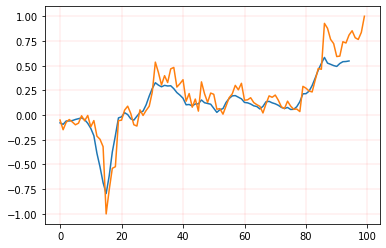

50 45 48 47 57


In [69]:
WS = 5
df = pd.read_csv('F:\\ut\\8\\proje\\data\\newbit.csv').dropna()
df = df.iloc[[x for x in range(0,20000,10)]]
class Bitcoin(nn.Module):
    def __init__(self,inSize, touples_index, variant_size, hiddenSize, outSize, ws):
        super().__init__()
        self.hiddenSize = hiddenSize
        self.inSize = inSize
        self.ws = ws
        self.touples_index = touples_index
        varient_lstm = []
        lstm = []
        for i, item in enumerate(variant_size):
            varient_lstm.append(nn.LSTM(2,item, num_layers=2, dropout=.3))
            varient_lstm.append(nn.LSTM(item, 1, num_layers=1, dropout=.2))
        self.varient_lstm = nn.ModuleList(varient_lstm)
        self.variant_size = variant_size
        for i,item in enumerate(hiddenSize):
            lstm.append(nn.LSTM(inSize,hiddenSize[i],num_layers=1,dropout=.2))
            inSize = hiddenSize[i]
        self.lstm = nn.ModuleList(lstm)
        self.linear = nn.Linear(hiddenSize[-1], outSize)
        self.reset()
        
    def reset(self):
        self.hiddenMemory =[]
        self.varient_mem = []
        for item in self.variant_size:
            self.varient_mem.append((torch.zeros(2,1,item).cuda(), torch.zeros(2,1,item).cuda()))
            self.varient_mem.append((torch.zeros(1,1,1).cuda(), torch.zeros(1,1,1).cuda()))
            
        for item in self.hiddenSize:
            self.hiddenMemory.append((torch.zeros(1,1,item).cuda(),\
                            torch.zeros(1,1,item).cuda()))
    def forward(self,seq):
#         seq=seq.view(self.ws, -1, self.inSize)
        var_x = seq[1]
        var_result = [0 for x in range(len(var_x))]
        for i in range(0, len(self.varient_mem), 2):
            x ,self.varient_mem[i]= self.varient_lstm[i](var_x[int(i/2)], self.varient_mem[i])
            var_result[int(i/2)] ,self.varient_mem[i+1]= self.varient_lstm[i+1](x, self.varient_mem[i+1])
        
        x = torch.cat(var_result, 2)
        seq = torch.cat((seq[0], x), 2)

        for i,item1 in enumerate(self.hiddenMemory):
            seq ,self.hiddenMemory[i]= self.lstm[i](seq, self.hiddenMemory[i])
        x = self.linear(seq)
        return x[-1]
instance = Bitcoin(3, [(1,2), (3,4)], [150,150], [200, 250 ,300,100],1,WS).cuda()
instance.load_state_dict(torch.load('F:\\ut\\8\\proje\\PN_result\\LSTM_taklaye_ws5_variantSize_150150200250300100.pn'))
torch.manual_seed(33)
def make_input(seq, ws, touples, st_col=0, end_col=0):
    output = []
    for item in range(len(seq) - ws):
        l = []
        for item2 in touples:
                l.append(torch.FloatTensor(seq[item:item+ws][ [item2[0], item2[1]] ].values.astype(float).reshape(ws, -1, 2)).cuda())
        
        not_used_col =set(range(st_col, end_col))
        for i in touples:
            not_used_col.remove(i[0])
            not_used_col.remove(i[1])

        not_used_col = list(not_used_col)
        output.append( ( (torch.FloatTensor( seq[item:item+ws][not_used_col].values.astype(float).reshape(ws, -1, len(not_used_col)) ).cuda(), l),\
                        torch.FloatTensor(np.array(seq[item + ws:item + ws+1][end_col])).cuda()) )
    return output

traincol = ['Open','High','Low', 'Close', 'Volume_(Currency)', ]
resultCol = ['Weighted_Price']
scaler = MinMaxScaler(feature_range=(-1, 1 ))
# add_indicators()
new_df=np.append(df[traincol], df['Close'].values.astype(float).reshape(-1,1), axis=1)
new_df = pd.DataFrame(data=new_df)

train_set = np.array(new_df[-500:-100].values.astype(float))
train_set = scaler.fit_transform(train_set)
train_set = pd.DataFrame(train_set)
train_set = make_input(train_set, WS, [(1,2), (3,4)], st_col=0, end_col=5)

test = new_df[-110:].values.astype(float)
test = scaler.fit_transform(test)
test = pd.DataFrame(test)
test = make_input(test,WS,[(1,2), (3,4)], st_col=0, end_col=5)
preds = []
real = []
with torch.no_grad():
    for item, y in test:
        instance.reset()

        preds.append(instance.forward(item))
        real.append(y)
plt.plot(range(95), preds[-95:],)
# plt.show()
plt.grid(color='r', linestyle='-', linewidth=.1, zorder=.1)
# plt.show()
plt.plot(range(100), real[-100:])
plt.show()
preds = preds[-96:]
real = real[-100:]
pred_up = 0
pred_down = 0
real_up = 0
real_down = 0
corect = 0
for i in range(1, min(len(preds), len((real)))):
    if preds[i] > preds[i-1]:
        pred_up += 1
    else:
        pred_down += 1
    if real[i] > real[i-1]:
        real_up += 1
        if preds[i] > preds[i-1]:
            corect += 1
    else:
        real_down += 1
        if preds[i] <= preds[i-1]:
            corect += 1
    
print(pred_up, pred_down, real_up, real_down, corect)

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


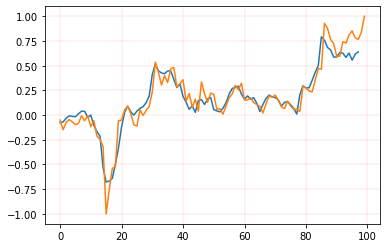

53 44 48 49 62


In [73]:
WS = 20
class Bitcoin(nn.Module):
    def __init__(self,inSize, touples_index, variant_size, hiddenSize, outSize, ws):
        super().__init__()
        self.hiddenSize = hiddenSize
        self.inSize = inSize
        self.ws = ws
        self.touples_index = touples_index
        varient_lstm = []
        lstm = []
        for i, item in enumerate(variant_size):
            varient_lstm.append(nn.LSTM(2,item, num_layers=2, dropout=.3))
            varient_lstm.append(nn.LSTM(item, 1, num_layers=1, dropout=.2))
        self.varient_lstm = nn.ModuleList(varient_lstm)
        self.variant_size = variant_size
        for i,item in enumerate(hiddenSize):
            lstm.append(nn.LSTM(inSize,hiddenSize[i],num_layers=1,dropout=.2))
            inSize = hiddenSize[i]
        self.lstm = nn.ModuleList(lstm)
        self.linear = nn.Linear(hiddenSize[-1], outSize)
        self.reset()
        
    def reset(self):
        self.hiddenMemory =[]
        self.varient_mem = []
        for item in self.variant_size:
            self.varient_mem.append((torch.zeros(2,1,item).cuda(), torch.zeros(2,1,item).cuda()))
            self.varient_mem.append((torch.zeros(1,1,1).cuda(), torch.zeros(1,1,1).cuda()))
            
        for item in self.hiddenSize:
            self.hiddenMemory.append((torch.zeros(1,1,item).cuda(),\
                            torch.zeros(1,1,item).cuda()))
    def forward(self,seq):
#         seq=seq.view(self.ws, -1, self.inSize)
        var_x = seq[1]
        var_result = [0 for x in range(len(var_x))]
        for i in range(0, len(self.varient_mem), 2):
            x ,self.varient_mem[i]= self.varient_lstm[i](var_x[int(i/2)], self.varient_mem[i])
            var_result[int(i/2)] ,self.varient_mem[i+1]= self.varient_lstm[i+1](x, self.varient_mem[i+1])
        
        x = torch.cat(var_result, 2)
        seq = torch.cat((seq[0], x), 2)

        for i,item1 in enumerate(self.hiddenMemory):
            seq ,self.hiddenMemory[i]= self.lstm[i](seq, self.hiddenMemory[i])
        x = self.linear(seq)
        return x[-1]
instance = Bitcoin(3, [(1,2), (3,4)], [150,150], [200, 250 ,300,100],1,WS).cuda()
instance.load_state_dict(torch.load('F:\\ut\\8\\proje\\PN_result\\LSTM_taklaye_ws20_variantSize_150150200250300100.pn'))
torch.manual_seed(33)
def make_input(seq, ws, touples, st_col=0, end_col=0):
    output = []
    for item in range(len(seq) - ws):
        l = []
        for item2 in touples:
                l.append(torch.FloatTensor(seq[item:item+ws][ [item2[0], item2[1]] ].values.astype(float).reshape(ws, -1, 2)).cuda())
        
        not_used_col =set(range(st_col, end_col))
        for i in touples:
            not_used_col.remove(i[0])
            not_used_col.remove(i[1])

        not_used_col = list(not_used_col)
        output.append( ( (torch.FloatTensor( seq[item:item+ws][not_used_col].values.astype(float).reshape(ws, -1, len(not_used_col)) ).cuda(), l),\
                        torch.FloatTensor(np.array(seq[item + ws:item + ws+1][end_col])).cuda()) )
    return output

traincol = ['Open','High','Low', 'Close', 'Volume_(Currency)', ]
resultCol = ['Weighted_Price']
scaler = MinMaxScaler(feature_range=(-1, 1 ))
# add_indicators()
new_df=np.append(df[traincol], df['Close'].values.astype(float).reshape(-1,1), axis=1)
new_df = pd.DataFrame(data=new_df)

train_set = np.array(new_df[-500:-100].values.astype(float))
train_set = scaler.fit_transform(train_set)
train_set = pd.DataFrame(train_set)
train_set = make_input(train_set, WS, [(1,2), (3,4)], st_col=0, end_col=5)

test = new_df[-120:].values.astype(float)
test = scaler.fit_transform(test)
test = pd.DataFrame(test)
test = make_input(test,WS,[(1,2), (3,4)], st_col=0, end_col=5)
preds = []
real = []
with torch.no_grad():
    for item, y in test:
        instance.reset()

        preds.append(instance.forward(item))
        real.append(y)
plt.plot(range(98), preds[-98:],)
# plt.show()
plt.grid(color='r', linestyle='-', linewidth=.1, zorder=.1)
# plt.show()
plt.plot(range(100), real[-100:])
plt.show()
preds = preds[-98:]
real = real[-100:]
pred_up = 0
pred_down = 0
real_up = 0
real_down = 0
corect = 0
for i in range(1, min(len(preds), len((real)))):
    if preds[i] > preds[i-1]:
        pred_up += 1
    else:
        pred_down += 1
    if real[i] > real[i-1]:
        real_up += 1
        if preds[i] > preds[i-1]:
            corect += 1
    else:
        real_down += 1
        if preds[i] <= preds[i-1]:
            corect += 1
    
print(pred_up, pred_down, real_up, real_down, corect)

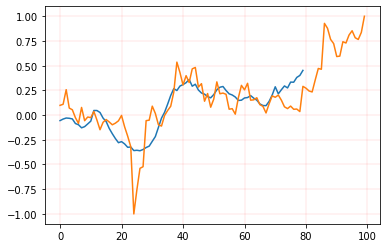

42 37 41 38 48


In [135]:
WS = 20
df = pd.read_csv('F:\\ut\\8\\proje\\data\\newbit.csv').dropna()
df = df.iloc[[x for x in range(0,20000,10)]]
class Bitcoin(nn.Module):
    def __init__(self,inSize, hiddenSize, outSize, ws):
        super().__init__()
        self.hiddenSize = hiddenSize
        self.inSize = inSize
        self.ws = ws
        lstm = []
        for i,item in enumerate(hiddenSize):
            lstm.append(nn.LSTM(inSize,hiddenSize[i],num_layers=2,dropout=.2))
            inSize = hiddenSize[i]
        self.lstm = nn.ModuleList(lstm)
        self.linear = nn.Linear(hiddenSize[-1], outSize)
        self.reset()
    def reset(self):
        self.hiddenMemory =[]
        for item in self.hiddenSize:
            self.hiddenMemory.append((torch.zeros(2,1,item).cuda(),\
                            torch.zeros(2,1,item).cuda()))
    def forward(self,seq):
        seq=seq.view(self.ws, -1, self.inSize)
        for i,item1 in enumerate(self.hiddenMemory):
            seq ,self.hiddenMemory[i]= self.lstm[i](seq, self.hiddenMemory[i])
        x = self.linear(seq)
        return x[-1]
def make_input(seq,ws, st_col=0, end_col=0):
    output = []
    for item in range(len(seq) - ws):
        if st_col == end_col == 0:
            output.append( ((seq[item:item+ws].reshape(1,-1)[0].cuda()),\
                            torch.FloatTensor(np.array(seq[item + ws:item + ws+1][-1][-1])).cuda()) )
        else:
            output.append(((torch.FloatTensor(pd.DataFrame([x[st_col:end_col] for x in seq[item:item+ws]]).values.astype(float).reshape(1,-1)[0]).cuda()),\
                            torch.FloatTensor(np.array(seq[item + ws:item + ws+1][-1][-1])).cuda()))
    return output
def PCA_function(data_frame, n_components):
    sc = StandardScaler()
    X_train = sc.fit_transform(data_frame)
    pca = PCA(n_components=n_components)
    X_train = pca.fit_transform(X_train)
    return X_train
def add_indicators():
    added_columns = ['MA5','MA10','MA20', 'DIFF', 'BU', 'BL', 'Stochastic', \
                 'ROC', 'RSI6', 'RSI12', 'ATR', 'WR5', 'WR10', 'UOS'\
                     'I30', 'I31', 'I32', 'I33', 'I34', 'I35', 'I36', \
                      'I28', 'I29'   ]
    close = df['Close']
    df['MA5'] = close.rolling(window=5).mean()
    df['MA10'] = close.rolling(window=10).mean()
    df['MA20'] = close.rolling(window=20).mean()
    df['DIFF'] = EMAIndicator(close, n=12).ema_indicator() - EMAIndicator(close, n=26).ema_indicator()
    df['BL']=BollingerBands(close, n=20, ndev=2).bollinger_lband()
    df['BU']=BollingerBands(close, n=20, ndev=2).bollinger_hband()
    df['Stochastic']=StochasticOscillator(df['High'], df['Low'], close).stoch()
    df['ROC'] = ROCIndicator(close).roc()
    df['RSI6'] = RSIIndicator(close, 6).rsi()
    df['RSI12'] = RSIIndicator(close, 12).rsi()
    df['ATR'] = AverageTrueRange(df['High'],df['Low'], close).average_true_range() 
    df['WR10'] = WilliamsRIndicator(df['High'],df['Low'], close, lbp=10).wr()
    df['WR5'] = WilliamsRIndicator(df['High'],df['Low'], close, lbp=5).wr()
    df['UOS'] = UltimateOscillator(df['High'],df['Low'], close,).uo()
    df['I28'] = close.diff(1) / close.shift(1)
    df['I29'] = (close - df['Open']) / df['Open']
    df['I30'] = (close - df['High']) / (df['High'] - df['Low'])
    df['I31'] = df['MA5'].diff(1) / df['MA5'].shift(1)
    df['I32'] = df['MA10'].diff(1) / df['MA10'].shift(1)
    df['I33'] = df['MA20'].diff(1) / df['MA20'].shift(1)
    df['I34'] = df['MA5'].diff(1) / df['MA20'].shift(1)
    df['I35'] = (close - np.array([np.amin(close[:x]) for x in range(len(close))]))/np.array([np.amin(close[:x]) for x in range(len(close))])
    df['I36'] = (close - np.array([np.amax(close[:x]) for x in range(len(close))]))/np.array([np.amax(close[:x]) for x in range(len(close))])
    df.dropna(inplace= True)
    return added_columns
instance = Bitcoin(10,[200,300,100],1,WS).cuda()

instance.load_state_dict(torch.load('F:\\ut\\8\\proje\\PN_result\\PCA_LSTM_OUT10_32Indicators_ws20.pn'))


scaler = MinMaxScaler(feature_range=(-1, 1 ))
add_indicators()

new_df = np.array(PCA_function(df, 10))
new_df=np.append(new_df, df['Close'].values.astype(float).reshape(-1,1), axis=1)
new_df = pd.DataFrame(data=new_df)

test = np.array(new_df[-120:].values.astype(float))#.reshape(-1,1)
test = scaler.fit_transform(test)
# train_set = torch.FloatTensor(train_set)
test = make_input(test, WS, st_col=0, end_col=10)


# test = df[resultCol][-100:].values.astype(float)#.reshape(-1,1)
# test = scaler.fit_transform(test)
# # test = torch.FloatTensor(test)
# # test = make_input(test,WS)
# test = train_set[-200:]


preds = []
real = []
with torch.no_grad():
    for item, y in test:
        instance.reset()

        preds.append(instance.forward(item))
        real.append(y)
plt.plot(range(80), preds[-80:],)
# plt.show()
plt.grid(color='r', linestyle='-', linewidth=.1, zorder=.1)
# plt.show()
plt.plot(range(100), real[-100:])
plt.show()
preds = preds[-80:]
pred_up = 0
pred_down = 0
real_up = 0
real_down = 0
corect = 0
for i in range(1, min(len(preds), len((real)))):
    if preds[i] > preds[i-1]:
        pred_up += 1
    else:
        pred_down += 1
    if real[i] > real[i-1]:
        real_up += 1
        if preds[i] > preds[i-1]:
            corect += 1
    else:
        real_down += 1
        if preds[i] <= preds[i-1]:
            corect += 1
    
print(pred_up, pred_down, real_up, real_down, corect)

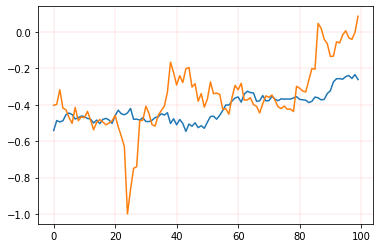

83 96 94 85 96


In [104]:
WS = 20
df = pd.read_csv('F:\\ut\\8\\proje\\data\\newbit.csv').dropna()
df = df.iloc[[x for x in range(0,20000,10)]]
class Bitcoin(nn.Module):
    def __init__(self,inSize, hiddenSize, outSize, ws):
        super().__init__()
        self.hiddenSize = hiddenSize
        self.inSize = inSize
        self.ws = ws
        lstm = []
        for i,item in enumerate(hiddenSize):
            lstm.append(nn.LSTM(inSize,hiddenSize[i],num_layers=2,dropout=.2))
            inSize = hiddenSize[i]
        self.lstm = nn.ModuleList(lstm)
        self.linear = nn.Linear(hiddenSize[-1], outSize)
        self.reset()
    def reset(self):
        self.hiddenMemory =[]
        for item in self.hiddenSize:
            self.hiddenMemory.append((torch.zeros(2,1,item).cuda(),\
                            torch.zeros(2,1,item).cuda()))
    def forward(self,seq):
        seq=seq.view(self.ws, -1, self.inSize)
        for i,item1 in enumerate(self.hiddenMemory):
            seq ,self.hiddenMemory[i]= self.lstm[i](seq, self.hiddenMemory[i])
        x = self.linear(seq)
        return x[-1]
def make_input(seq,ws, st_col=0, end_col=0):
    output = []
    for item in range(len(seq) - ws):
        if st_col == end_col == 0:
            output.append( ((seq[item:item+ws].reshape(1,-1)[0].cuda()),\
                            torch.FloatTensor(np.array(seq[item + ws:item + ws+1][-1][-1])).cuda()) )
        else:
            output.append(((torch.FloatTensor(pd.DataFrame([x[st_col:end_col] for x in seq[item:item+ws]]).values.astype(float).reshape(1,-1)[0]).cuda()),\
                            torch.FloatTensor(np.array(seq[item + ws:item + ws+1][-1][-1])).cuda()))
    return output
def PCA_function(data_frame, n_components):
    sc = StandardScaler()
    X_train = sc.fit_transform(data_frame)
    pca = PCA(n_components=n_components)
    X_train = pca.fit_transform(X_train)
    return X_train
def add_indicators():
    added_columns = ['MA5','MA10','MA20', 'DIFF', 'BU', 'BL', 'Stochastic', \
                 'ROC', 'RSI6', 'RSI12', 'ATR', 'WR5', 'WR10', 'UOS'\
                     'I30', 'I31', 'I32', 'I33', 'I34', 'I35', 'I36', \
                      'I28', 'I29'   ]
    close = df['Close']
    df['MA5'] = close.rolling(window=5).mean()
    df['MA10'] = close.rolling(window=10).mean()
    df['MA20'] = close.rolling(window=20).mean()
    df['DIFF'] = EMAIndicator(close, n=12).ema_indicator() - EMAIndicator(close, n=26).ema_indicator()
    df['BL']=BollingerBands(close, n=20, ndev=2).bollinger_lband()
    df['BU']=BollingerBands(close, n=20, ndev=2).bollinger_hband()
    df['Stochastic']=StochasticOscillator(df['High'], df['Low'], close).stoch()
    df['ROC'] = ROCIndicator(close).roc()
    df['RSI6'] = RSIIndicator(close, 6).rsi()
    df['RSI12'] = RSIIndicator(close, 12).rsi()
    df['ATR'] = AverageTrueRange(df['High'],df['Low'], close).average_true_range() 
    df['WR10'] = WilliamsRIndicator(df['High'],df['Low'], close, lbp=10).wr()
    df['WR5'] = WilliamsRIndicator(df['High'],df['Low'], close, lbp=5).wr()
    df['UOS'] = UltimateOscillator(df['High'],df['Low'], close,).uo()
    df['I28'] = close.diff(1) / close.shift(1)
    df['I29'] = (close - df['Open']) / df['Open']
    df['I30'] = (close - df['High']) / (df['High'] - df['Low'])
    df['I31'] = df['MA5'].diff(1) / df['MA5'].shift(1)
    df['I32'] = df['MA10'].diff(1) / df['MA10'].shift(1)
    df['I33'] = df['MA20'].diff(1) / df['MA20'].shift(1)
    df['I34'] = df['MA5'].diff(1) / df['MA20'].shift(1)
    df['I35'] = (close - np.array([np.amin(close[:x]) for x in range(len(close))]))/np.array([np.amin(close[:x]) for x in range(len(close))])
    df['I36'] = (close - np.array([np.amax(close[:x]) for x in range(len(close))]))/np.array([np.amax(close[:x]) for x in range(len(close))])
    df.dropna(inplace= True)
    return added_columns
instance = Bitcoin(10,[200,300,100],1,WS).cuda()

instance.load_state_dict(torch.load('F:\\ut\\8\\proje\\PN_result\\PCA_LSTM_OUT10_32Indicators.pn'))


scaler = MinMaxScaler(feature_range=(-1, 1 ))
add_indicators()

new_df = np.array(PCA_function(df, 10))
new_df=np.append(new_df, df['Close'].values.astype(float).reshape(-1,1), axis=1)
new_df = pd.DataFrame(data=new_df)

test = np.array(new_df[-200:].values.astype(float))#.reshape(-1,1)
test = scaler.fit_transform(test)
# train_set = torch.FloatTensor(train_set)
test = make_input(test, WS, st_col=0, end_col=10)


# test = df[resultCol][-100:].values.astype(float)#.reshape(-1,1)
# test = scaler.fit_transform(test)
# # test = torch.FloatTensor(test)
# # test = make_input(test,WS)
# test = train_set[-200:]


preds = []
real = []
with torch.no_grad():
    for item, y in test:
        instance.reset()

        preds.append(instance.forward(item))
        real.append(y)
plt.plot(range(100), preds[-100:],)
# plt.show()
plt.grid(color='r', linestyle='-', linewidth=.1, zorder=.1)
# plt.show()
plt.plot(range(100), real[-100:])
plt.show()

pred_up = 0
pred_down = 0
real_up = 0
real_down = 0
corect = 0
for i in range(1, min(len(preds), len((real)))):
    if preds[i] > preds[i-1]:
        pred_up += 1
    else:
        pred_down += 1
    if real[i] > real[i-1]:
        real_up += 1
        if preds[i] >= preds[i-1]:
            corect += 1
    else:
        real_down += 1
        if preds[i] <= preds[i-1]:
            corect += 1
    
print(pred_up, pred_down, real_up, real_down, corect)